# CORRECT CAR PARKING

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

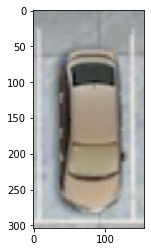

In [11]:
main_img = cv2.imread("Car_top1.jpg")
plt.imshow(main_img)

In [12]:
img = cv2.imread("Car_top1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
pts = []
for aperturesize in [5,7]:
    edges = cv2.Canny(gray,25,100,apertureSize = aperturesize)   #EDGED FORM
        
    lines = cv2.HoughLines(edges,1,np.pi/180,30)    #HOUGH TRANSFORMATION
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
        pts.append(x1)

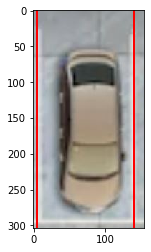

In [13]:
plt.imshow(img)

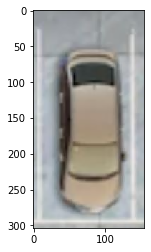

In [14]:
blurred = cv2.bilateralFilter(main_img,5,10,10)   #BLURRINNG
plt.imshow(blurred)

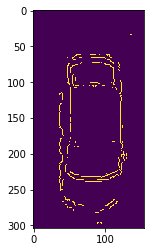

In [15]:
edges = cv2.Canny(blurred,140,150)   #CANNY EDGED FORM
plt.imshow(edges)

In [16]:
arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]!=0:             #STORING THE COORDINATES OF NON ZERO PIXELS
            arr.append(i)

PARKING OCCUPIED
correctly parked


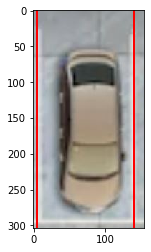

In [17]:
if len(arr)>1000:
    print("PARKING OCCUPIED")
    if max(pts)>=max(arr) and min(pts)<=min(arr):
        print("correctly parked")
    else:
        print("incorrectly parked")
        send_email("Your car is incorrectly parked")
else:
    print("Parking space available")
plt.imshow(img)

# INCORRECT CAR PARKING

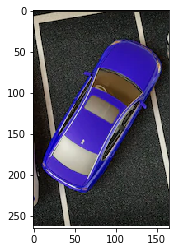

In [26]:
main_wr = cv2.imread("inc_park.jpg")
plt.imshow(main_wr)

In [27]:
img = cv2.imread("inc_park.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
pts = []
for aperturesize in [3,7]:
    edges = cv2.Canny(gray,230,240,apertureSize=aperturesize)        
    lines = cv2.HoughLines(edges,1,np.pi/180,100)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
        pts.append(x1)

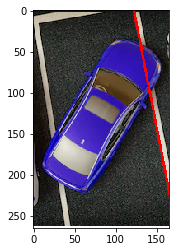

In [28]:
plt.imshow(img)

In [29]:
blurred = cv2.bilateralFilter(main_wr,5,10,10)

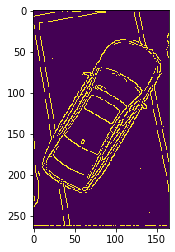

In [30]:
edges = cv2.Canny(blurred,230,240)
plt.imshow(edges)

In [31]:
edges.shape

(265, 165)

In [32]:
arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]!=0:
            arr.append(i)
len(arr)

3521

PARKING OCCUPIED
INCORRECTLY PARKED!!!


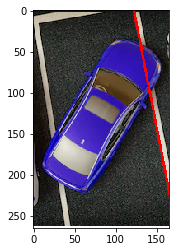

In [35]:
if len(arr)>1000:
    print("PARKING OCCUPIED")
    if max(pts)>=max(arr) and min(pts)<=min(arr):
        print("correctly parked")
    else:
        print("INCORRECTLY PARKED!!!")
        send_mail("Your car is incorrectly parked")
else:
    print("Parking space available")
plt.imshow(img)

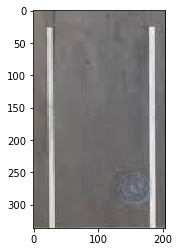

In [18]:
parking_top = cv2.imread("JUPYTER_DATA/best2.JPG")
plt.imshow(parking_top)

[179, 2]


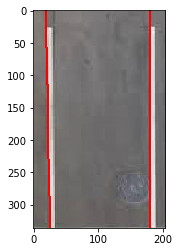

In [19]:
img = cv2.imread('JUPYTER_DATA/best2.JPG')
pts = []
blurred = cv2.blur(img,(4,2))
gray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
for aperturesize in [3,5]:

    edges = cv2.Canny(gray,140,160,apertureSize = aperturesize)

    lines = cv2.HoughLines(edges,1,np.pi/180,150)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
        pts.append(x1)
print(pts)
plt.imshow(img)

In [20]:
edges = cv2.Canny(img,200,210,apertureSize = 3)
print(edges)

[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255 255]
 [  0 255   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


In [21]:
arr=[]
for i in range(edges.shape[1]):
    for j in range(edges.shape[0]):
        if edges[j][i]>0 and max(pts)>i>min(pts):
            arr.append(i)
len(arr)    

1523

Parking space available


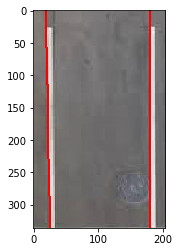

In [22]:
if len(arr)>2000:
    print("PARKING OCCUPIED")
    if max(pts)>=max(arr) and min(pts)<=min(arr):
        print("correctly parked")
    else:
        print("INCORRECTLY PARKED!!!")
else:
    print("Parking space available")
plt.imshow(img)

In [33]:
import smtplib, ssl
port = 465
sender, password = "hellothere456554@gmail.com","MemoryUnits_33"

In [34]:
def send_mail(msg):
    
    recieve = "parthsachan202@gmail.com"

    message = """Subject: CAR PARKING\n
              {} \n

              Regards""".format(msg)

    context = ssl.create_default_context()


    with smtplib.SMTP_SSL("smtp.gmail.com", port, context=context) as server:
        server.login(sender, password)
        server.sendmail(sender, recieve, message)